In [1]:
import os
try:
    os.chdir(base_dir) #if the start up file has already been run, this will change the dir back to base
except NameError:
    base_dir = None #if the start up file hasn't been run yet, this will allow us to run this cell without crashing

%run ./startup_file.ipynb #run startup file and install libraries if necessary

# STACK_NC

## Author: haley synan

##### *Last run on 2024-07-31*

#### Objectives:
* stack multiple netcdfs (using stack function in xarrray)
* find averages of data (in this case chlorophyll) across multiple dates

#### Table of Contents
* [Load satellite data](#two)
* [Stack data](#three)
* [Statistics](#four)
* [Plot data](#five)

#### History: <br>
>* *7/29/2024: created* <br>

### Load satellite data <a class="anchor" id="two"></a>

In [2]:
start_date = '2000-01-01' #(yyyy-mm-dd format)
end_date = '2000-01-31'

#OCCCI data
os.chdir(data_dir) #cd to data directory 
data_dir_fold = data_dir+'/Chlorophyll' #path for new folder 
ds = downloaddata(start_date, end_date, 'occci') 

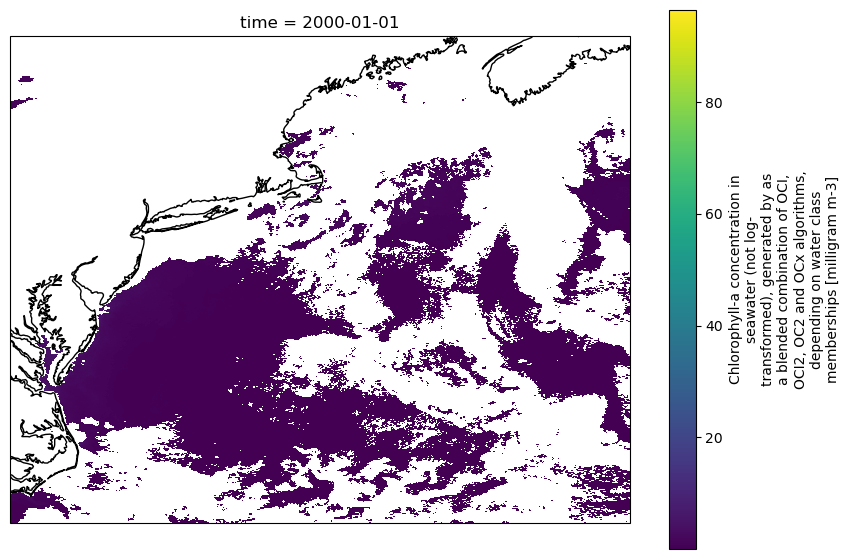

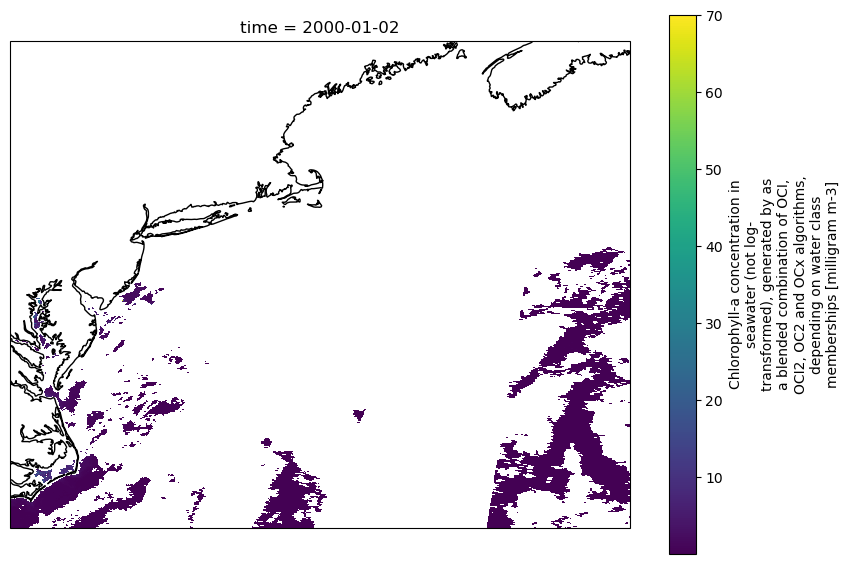

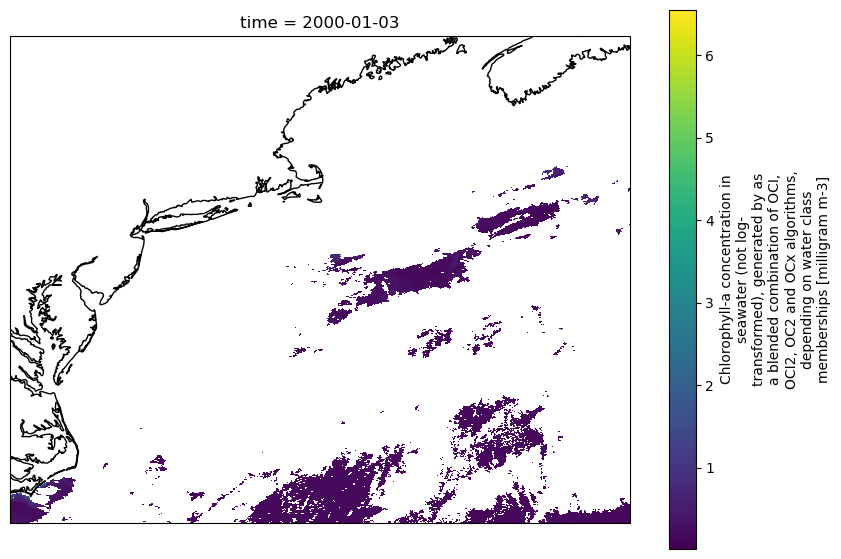

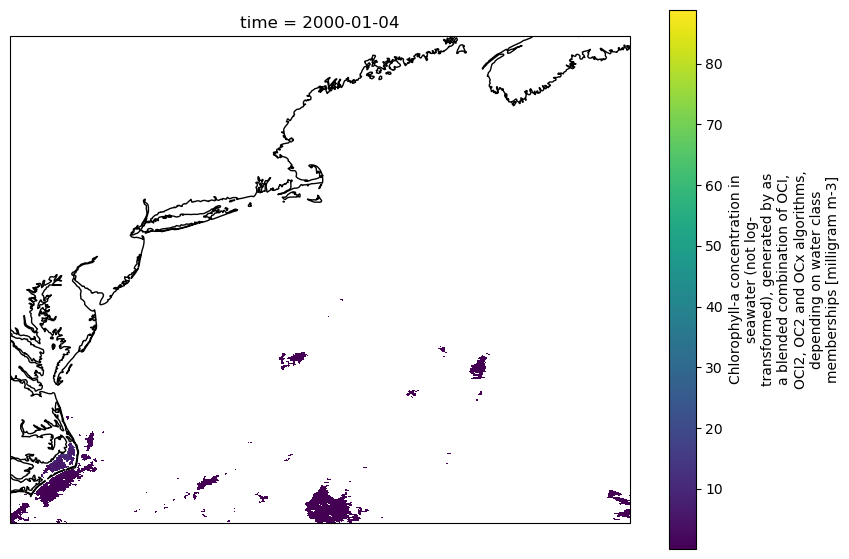

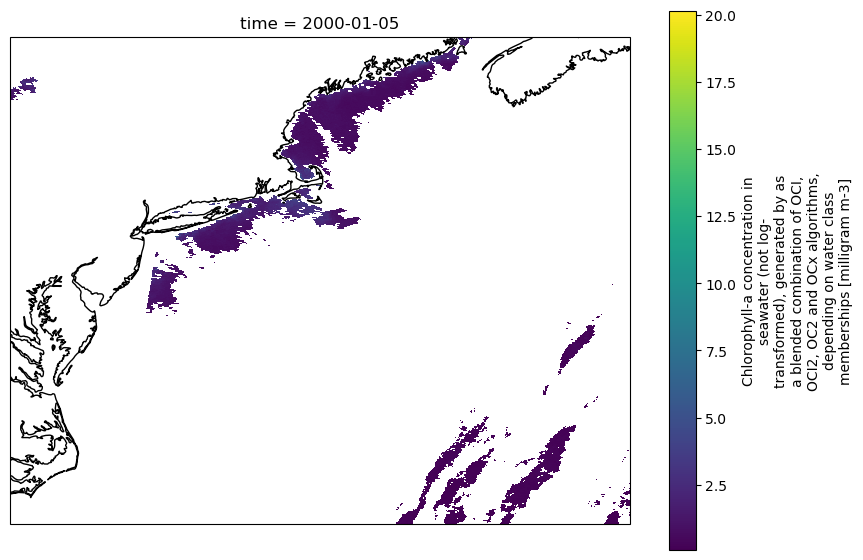

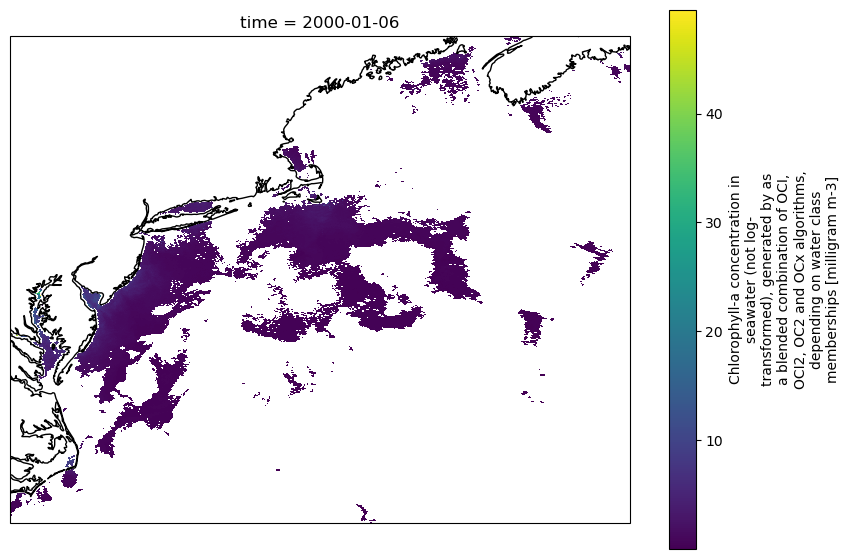

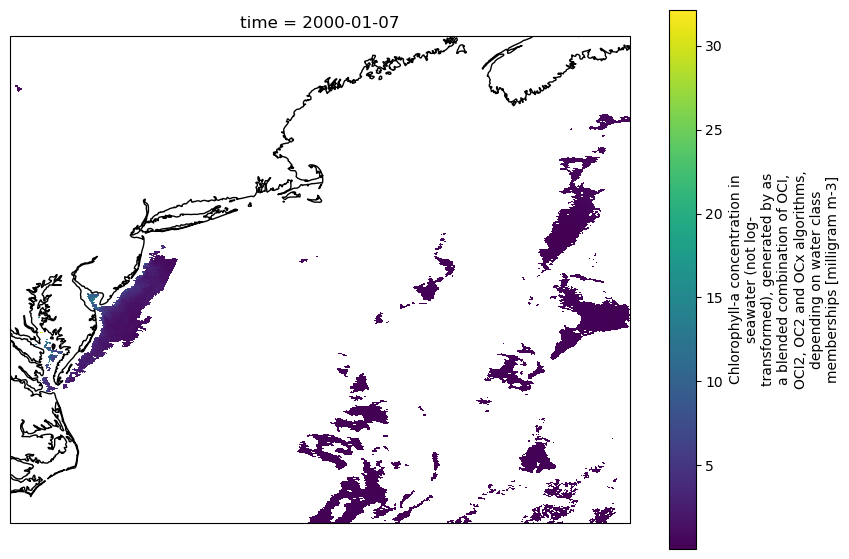

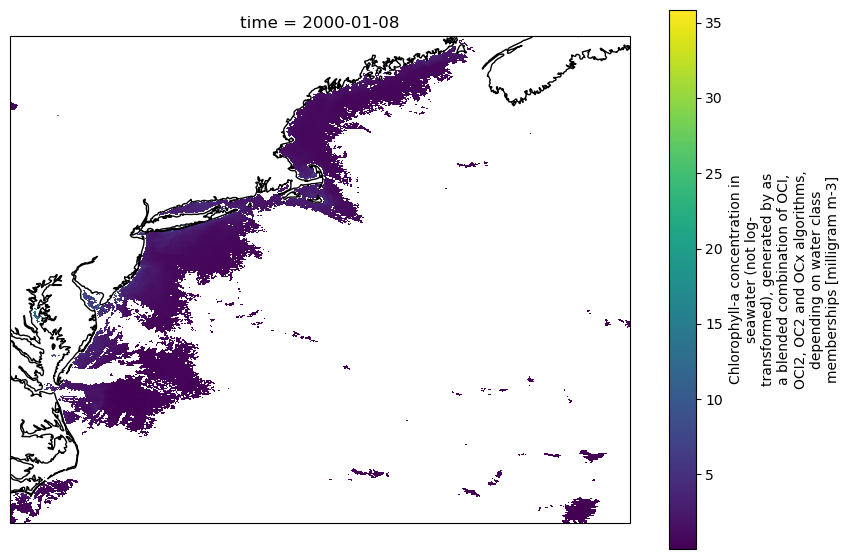

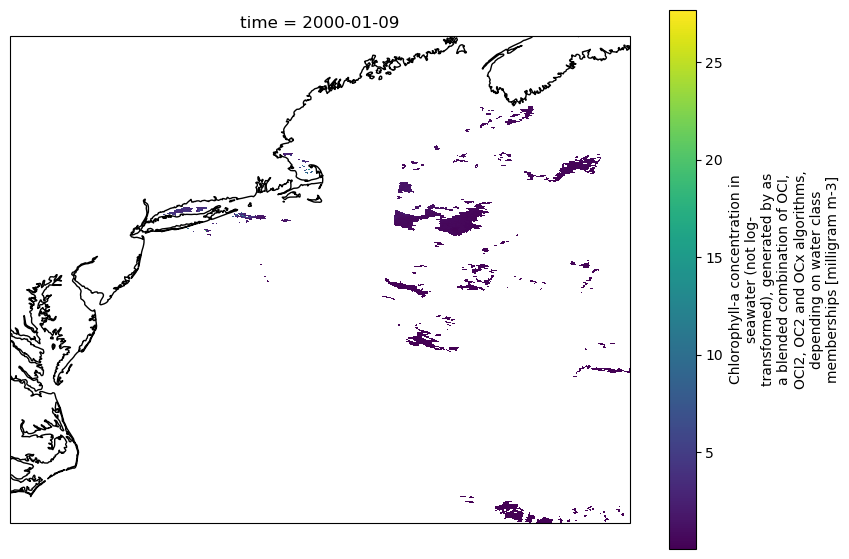

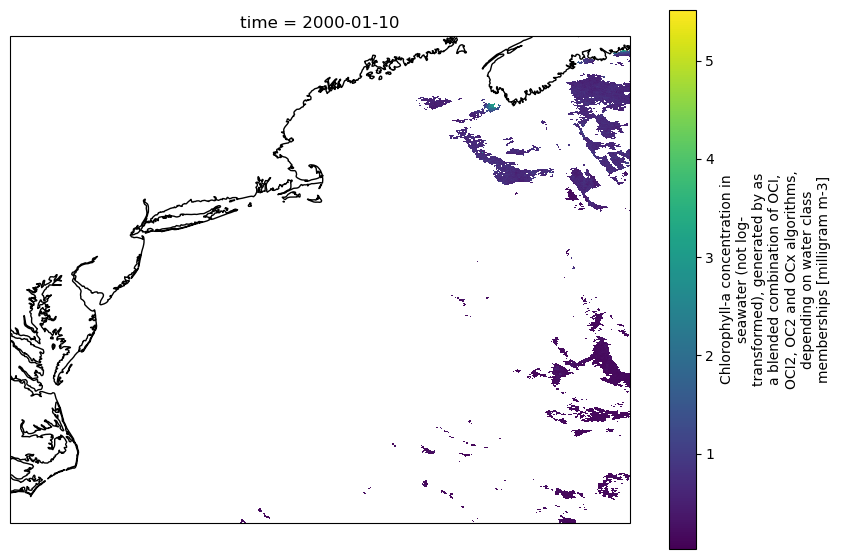

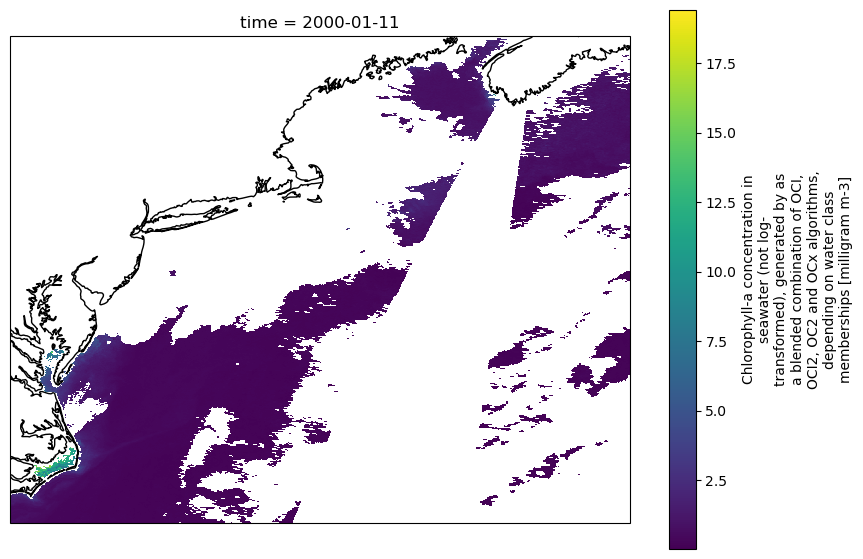

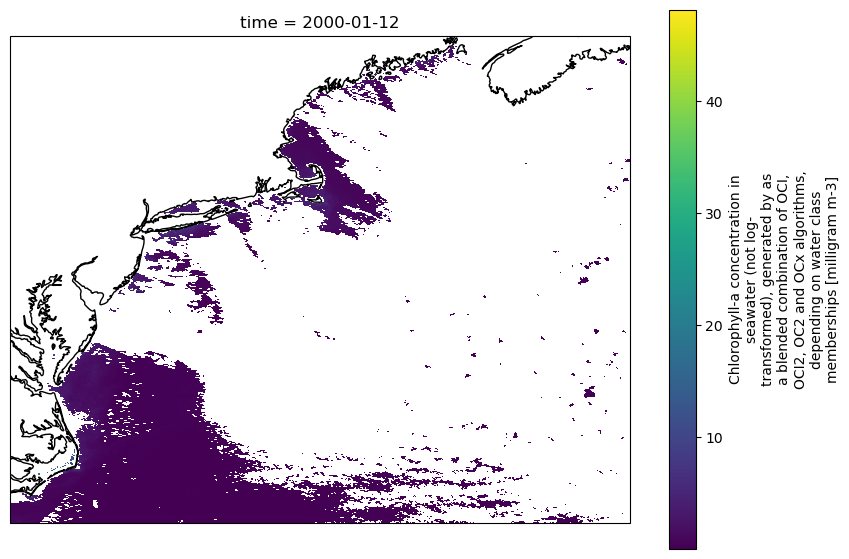

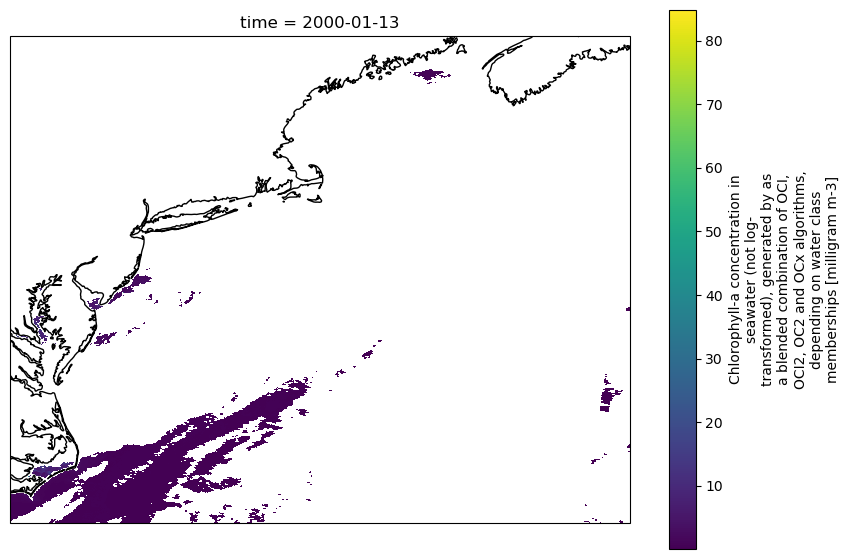

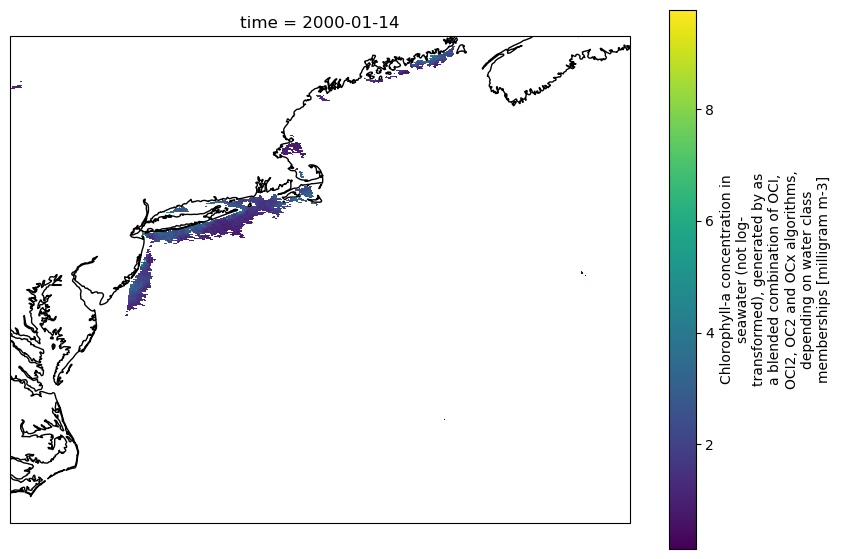

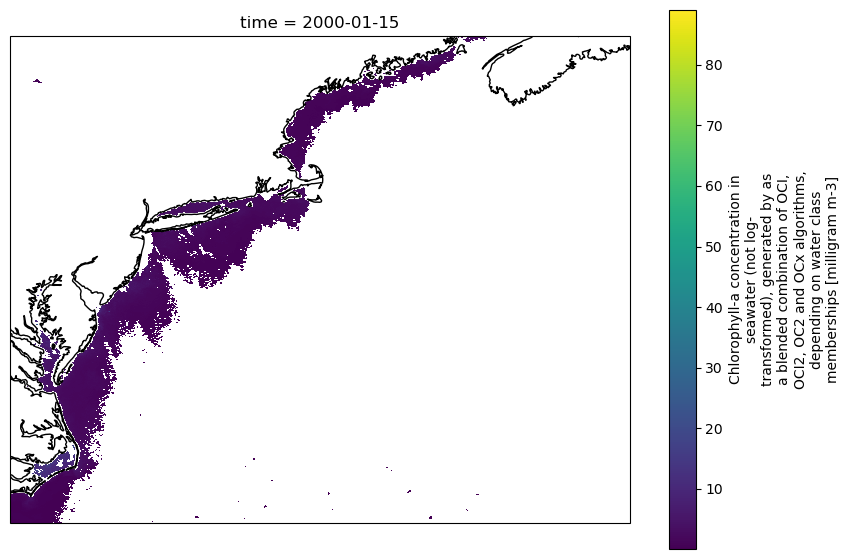

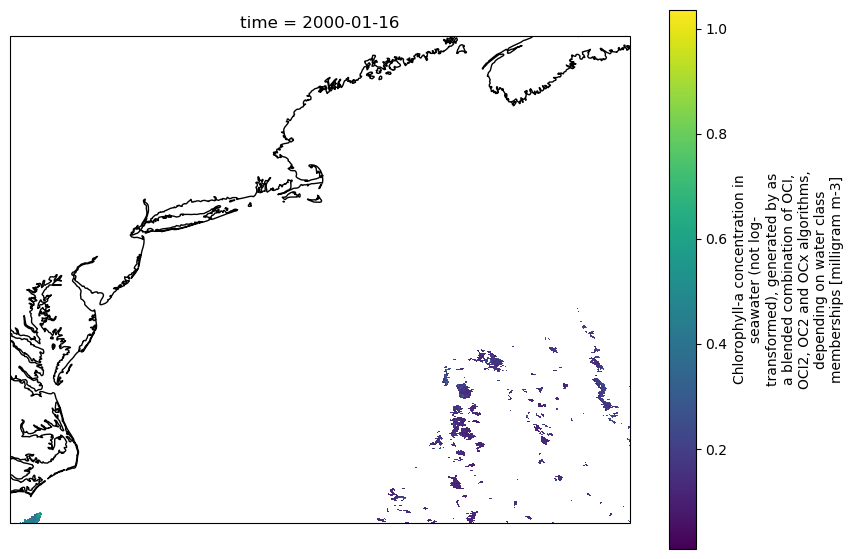

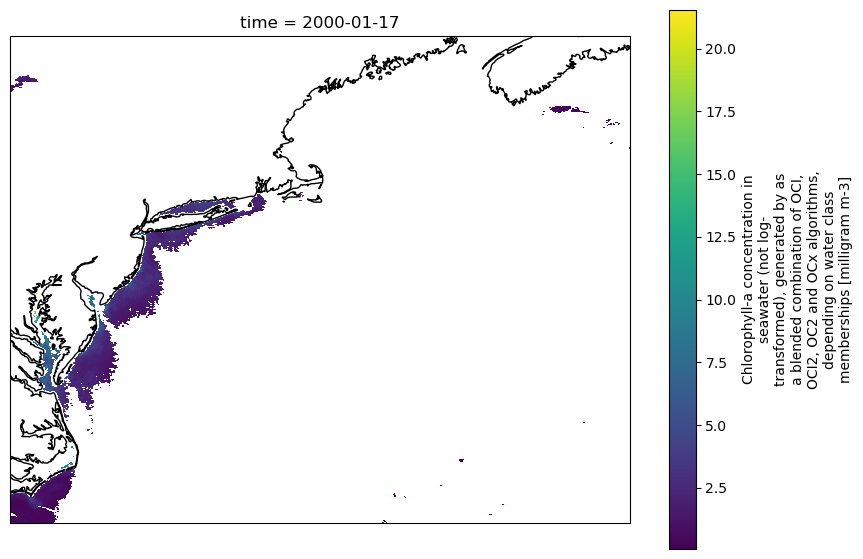

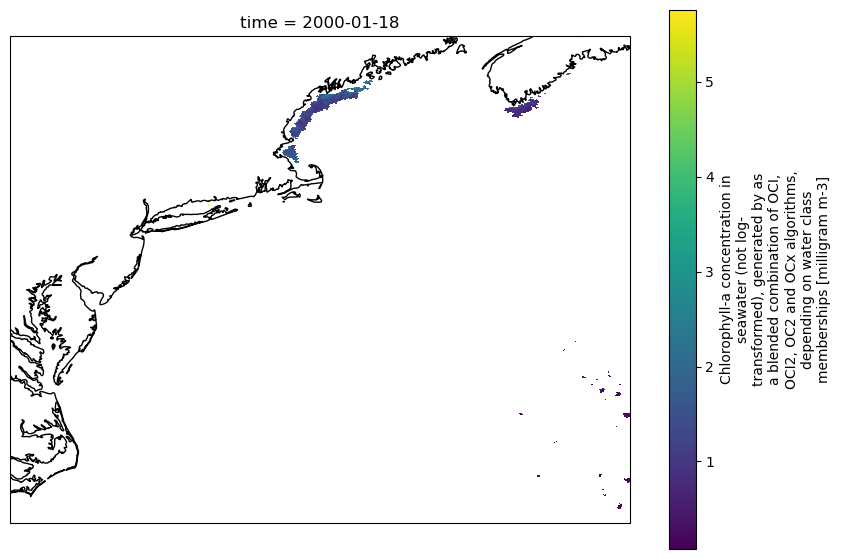

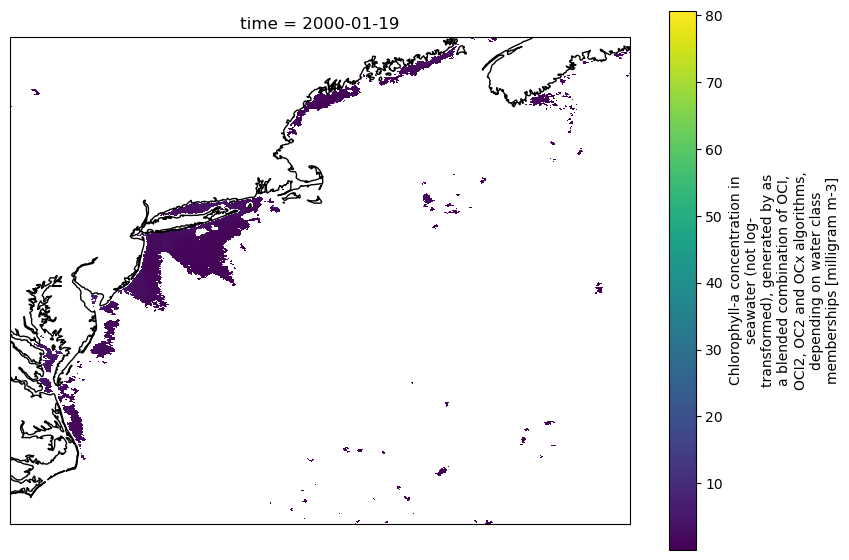

In [ ]:
#view data BEFORE stacking 
for x in range(len(ds.time)):
    
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection)
    ds.chlor_a[x].plot()
    ax.coastlines()


### Stack data <a class="anchor" id="three"></a>

In [3]:
stack = ds.stack(z=('latitude', 'longitude'))

### Statistics <a class="anchor" id="four"></a>

In [9]:
stacked_bytime= stack.mean(dim='time')

### Plot data <a class="anchor" id="five"></a>

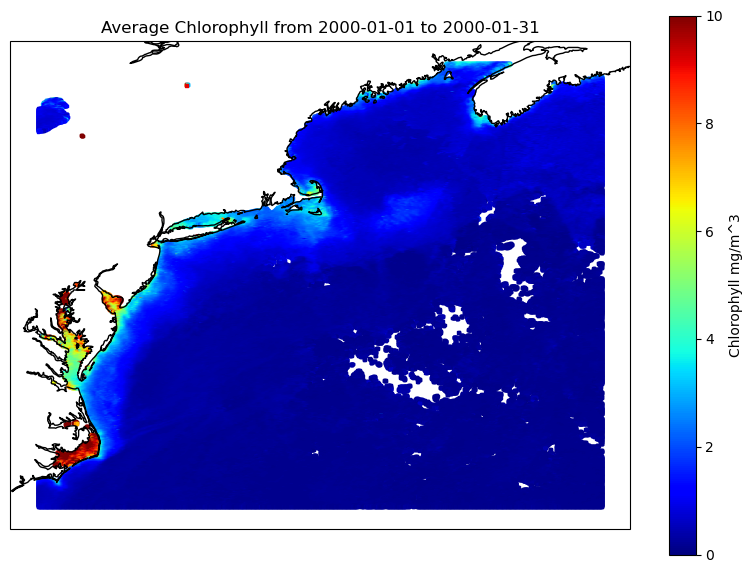

In [10]:
fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 
im =plt.scatter(stacked_bytime.longitude, stacked_bytime.latitude,c= stacked_bytime.chlor_a, cmap='jet', vmin = 0, vmax=10, marker='s', s=3)
ax.coastlines()
plt.title("Average Chlorophyll from" + ' '+start_date + ' '+'to' + ' '+end_date) #add title to plot
cb = plt.colorbar(im, label='Chlorophyll mg/m^3',) #colorbar title 
